In [1]:
import math
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

Načtení dat

In [2]:
X = sio.loadmat("../dataCustom.mat")["X"]
y = sio.loadmat("../dataCustom.mat")["y"]
beta_true = sio.loadmat("../dataCustom.mat")["beta_true"]

Hledání parametrů

In [3]:
# activeL má formát, který odpovídá dolní trojúhelníkové matici
# indexace probíhá nejprve dle sloupce a poté jsou vypsané aktivní řádky (pro korektní zápis je nutné indexovat pomocí na sloupci i až od i+1)
# activeL je reprezentováno Python polem délky len(beta)-1 (-1 za poslední sloupec kde není vektor l_j)

# příklad activeL, které odpovídá spodní diagonále - ekvivalentní s bayesLVLRegression (hladký i řídká model)
activeL = [
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [8],
    [9],
    [10],
    [11],
    [12],
    [13],
    [14],
]

# další příklad activeL - tato situace odpovídá sparseBayesRegression
# activeL = [
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     [],
#     []]

In [4]:
# Import modelů z ModelsCollection
import sys
sys.path.append('..')
from ModelsCollection import bayesGeneralLVLRegression,bayesLVLGeneralPositiveRegression

In [5]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

# Staré experimenty

Je zafixována activeL ve formátu připouštějící pouze vedlejší (dolní) diagonálu - grafy odpovídají minulému notebooku, takže nejspíše vše funguje jak má pro tento případ

## l0 = 0, bez podmínky pozitivity

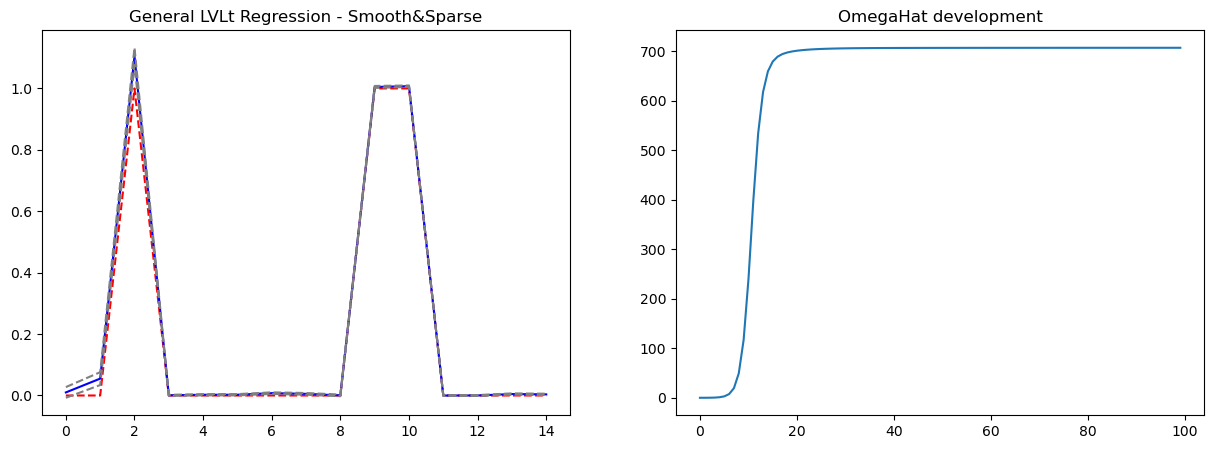

In [6]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - Smooth&Sparse")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

In [7]:
# betaHat zaokrouhlená na 3 desetinná místa pro účely porovnání s modelem uvažující pouze sekundární poddiagonálu
print(np.round(betaHat,3))

[[ 1.00e-02]
 [ 5.50e-02]
 [ 1.10e+00]
 [ 1.00e-03]
 [ 2.00e-03]
 [ 2.00e-03]
 [ 8.00e-03]
 [ 5.00e-03]
 [ 0.00e+00]
 [ 1.00e+00]
 [ 1.01e+00]
 [-0.00e+00]
 [ 0.00e+00]
 [ 5.00e-03]
 [ 4.00e-03]]


In [8]:
# pro lepší porovnání přímo srovnání pomocí numpy

from ModelsCollection import bayesLVLRegression
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)
betaHatSmooth, sigmaBetaSmooth, hist_omegaSmooth = bayesLVLRegression(X,y,l0)

print("Kontrola rovnosti kovariančních modelů (hladký i řídký model vůči obecné kovarianční struktuře):", np.all(np.isclose(betaHat,betaHatSmooth)))

Kontrola rovnosti kovariančních modelů (hladký i řídký model vůči obecné kovarianční struktuře): True


Neboli získaná $\widehat{\beta}$ je totožná s minulým modelem

## l0 = -1, bez podmínky pozitivity

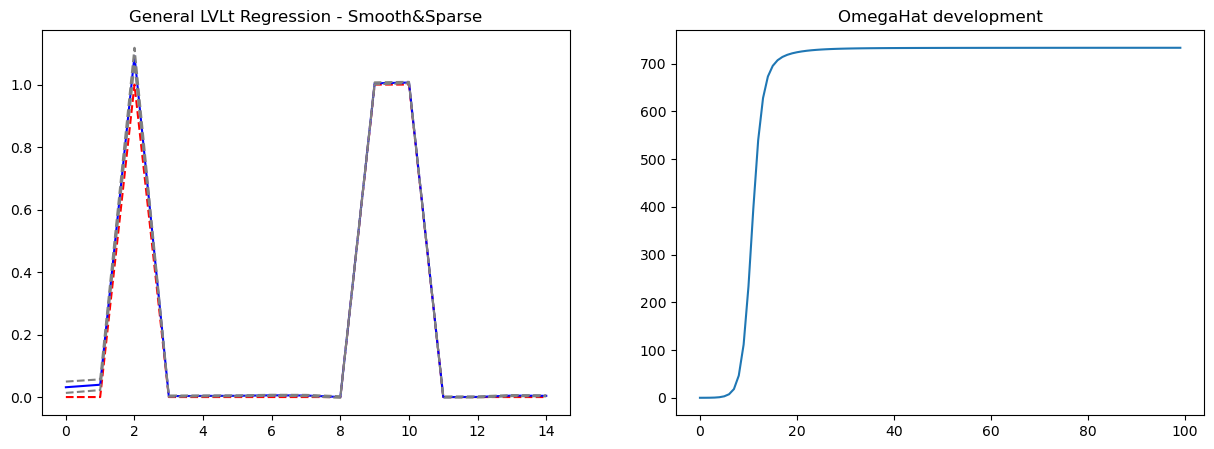

In [9]:
l0 = -1
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - Smooth&Sparse")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## l0 = 0, positive

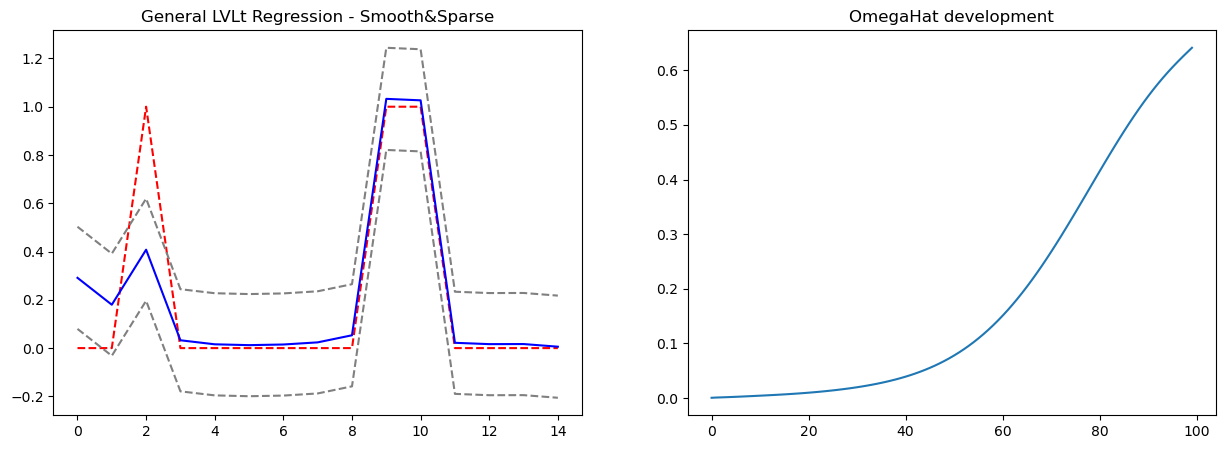

In [10]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesLVLGeneralPositiveRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - Smooth&Sparse")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## l0 = -1, positive

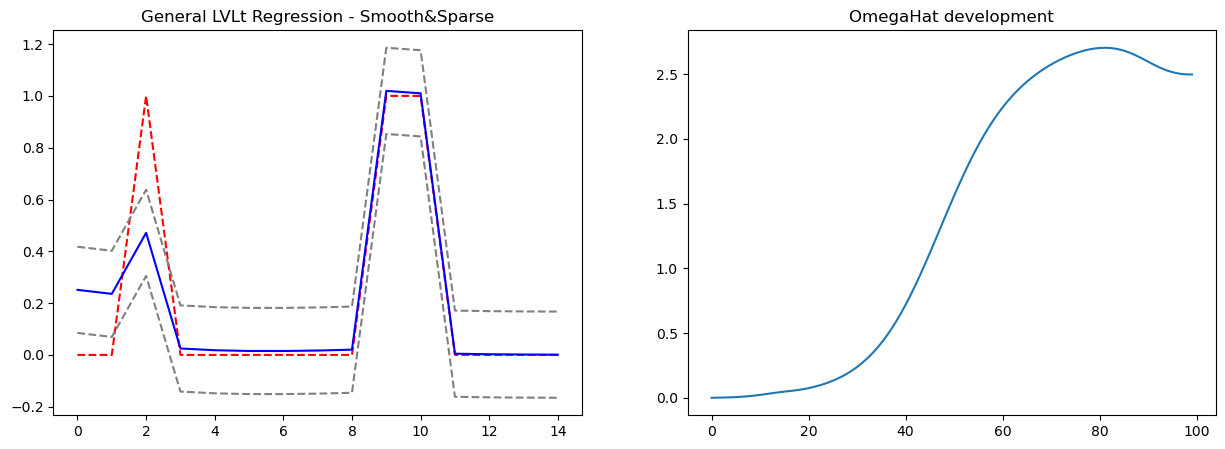

In [11]:
l0 = -1
betaHat, sigmaBeta, hist_omega = bayesLVLGeneralPositiveRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - Smooth&Sparse")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

# l0 = 0, positive, to_smooth

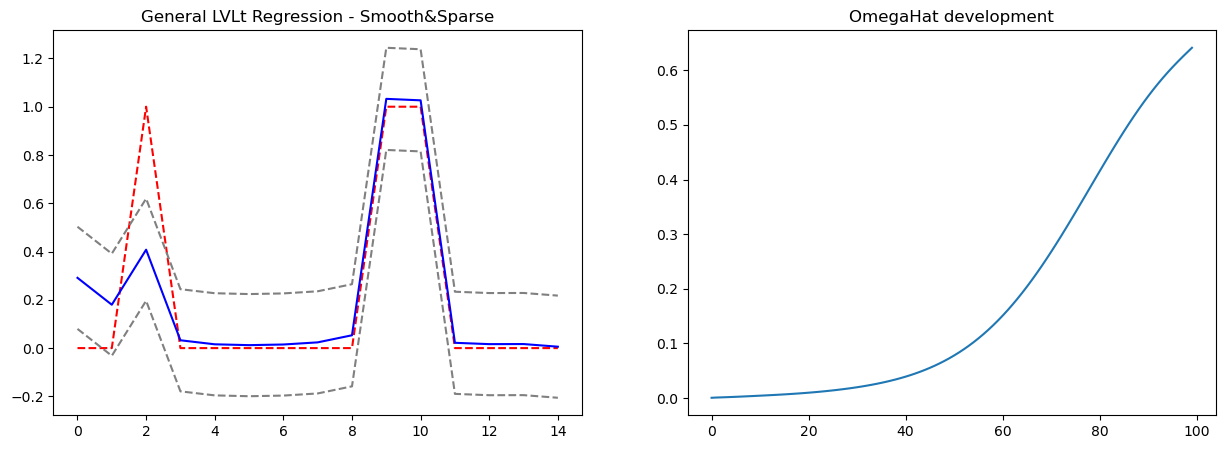

In [12]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesLVLGeneralPositiveRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - Smooth&Sparse")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

# l0 = -1, positive, to_smooth

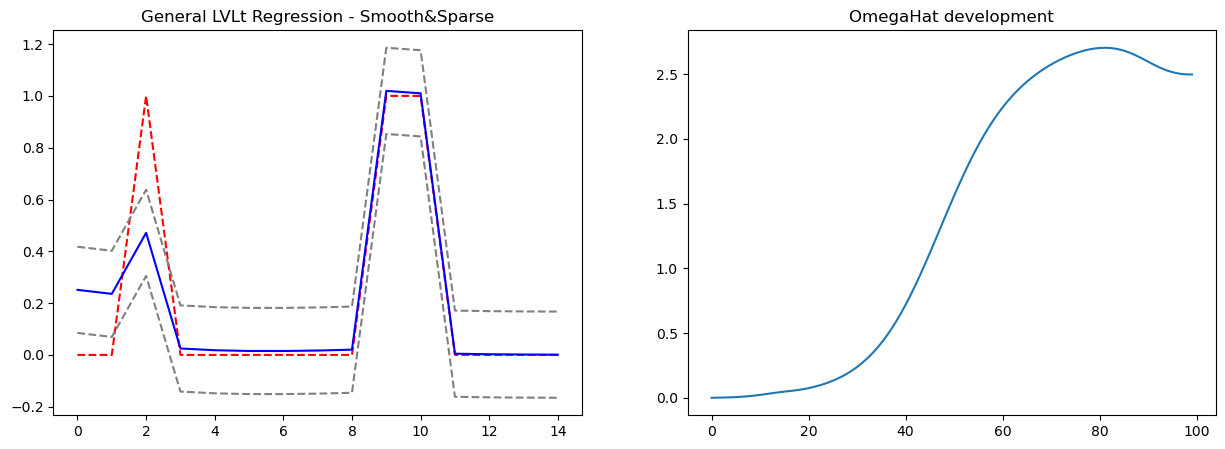

In [13]:
l0 = -1
betaHat, sigmaBeta, hist_omega = bayesLVLGeneralPositiveRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - Smooth&Sparse")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

# Nové testy

Ukázka chování s jinou maticí L - pro ukázání principu jen model bez pozitivity.

## Korelace s "jistou 0"

koreluji prvky s 15. prvkem (14. při indexaci od 0) se všemi ostatními 0 prvky

In [14]:
# pro přehlednost, celý vektor beta_true (z toho vyšly matice activeL)
beta_true

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [36]:
activeL = [
    [14],
    [14],
    [],
    [14],
    [14],
    [14],
    [14],
    [14],
    [],
    [],
    [14],
    [14],
    [14],
    [14],
]

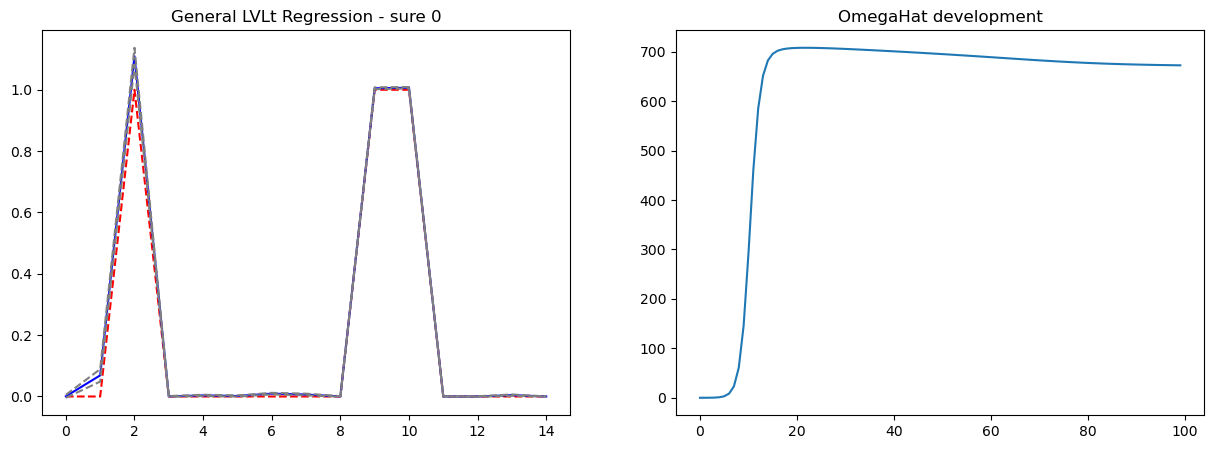

In [16]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - sure 0")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## Korelace s "jistou 1"

korelace s prvkem 10 (index 9)

In [45]:
activeL = [
    [],
    [],
    [9],
    [],
    [],
    [],
    [],
    [],
    [9],
    [],
    [],
    [],
    [],
    []
]


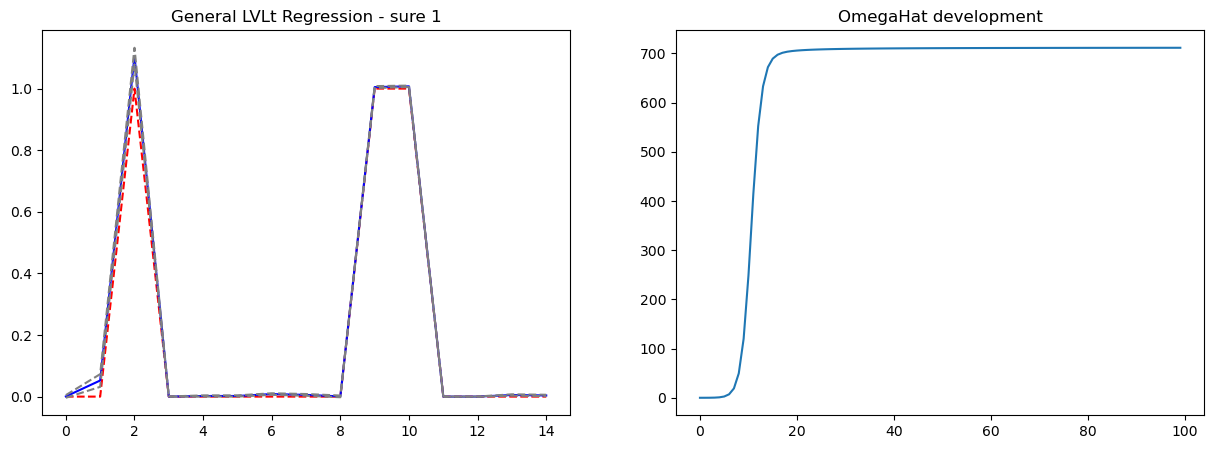

In [46]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - sure 1")


axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## Korelace s jistou 0 a 1

In [48]:
activeL = [
    [14],
    [14],
    [9],
    [14],
    [14],
    [14],
    [14],
    [14],
    [9],
    [],
    [14],
    [14],
    [14],
    [14],
]

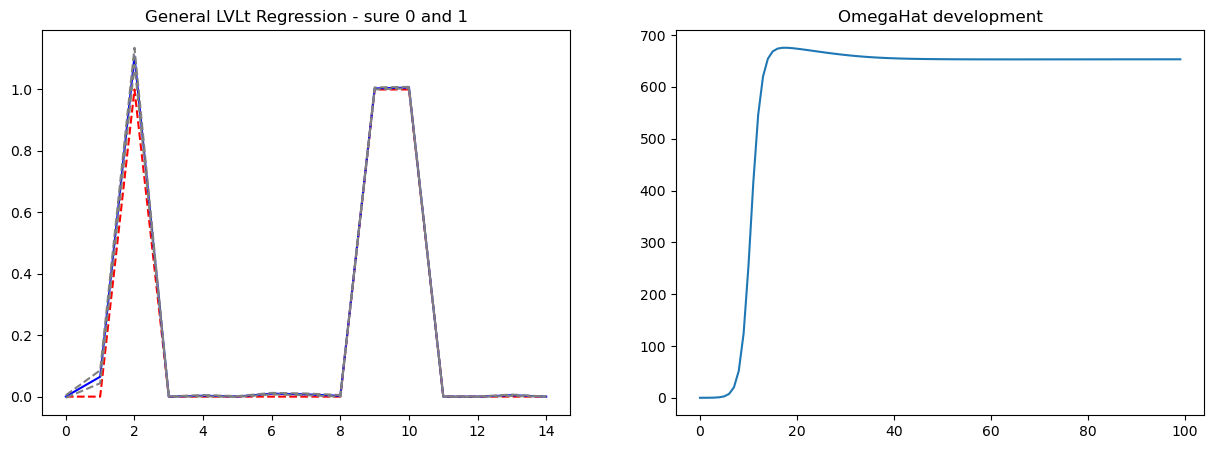

In [49]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - sure 0 and 1")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## Korelace všech 0

In [51]:
activeL = [
    [1,3,4,5,6,7,10,11,12,13,14],
    [3,4,5,6,7,10,11,12,13,14],
    [],
    [4,5,6,7,10,11,12,13,14],
    [5,6,7,10,11,12,13,14],
    [6,7,10,11,12,13,14],
    [7,10,11,12,13,14],
    [10,11,12,13,14],
    [],
    [],
    [11,12,13,14],
    [12,13,14],
    [13,14],
    [14],
]

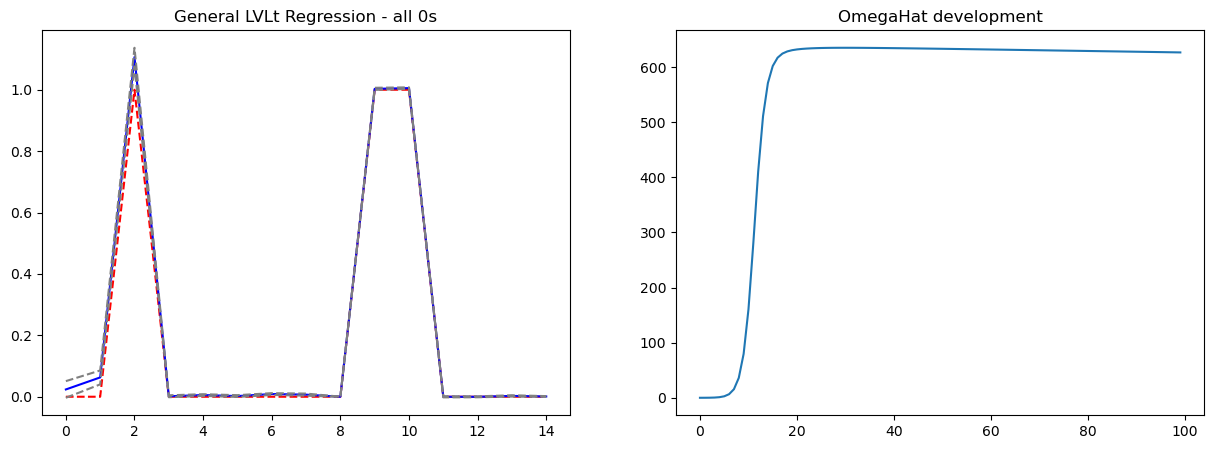

In [52]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - all 0s")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

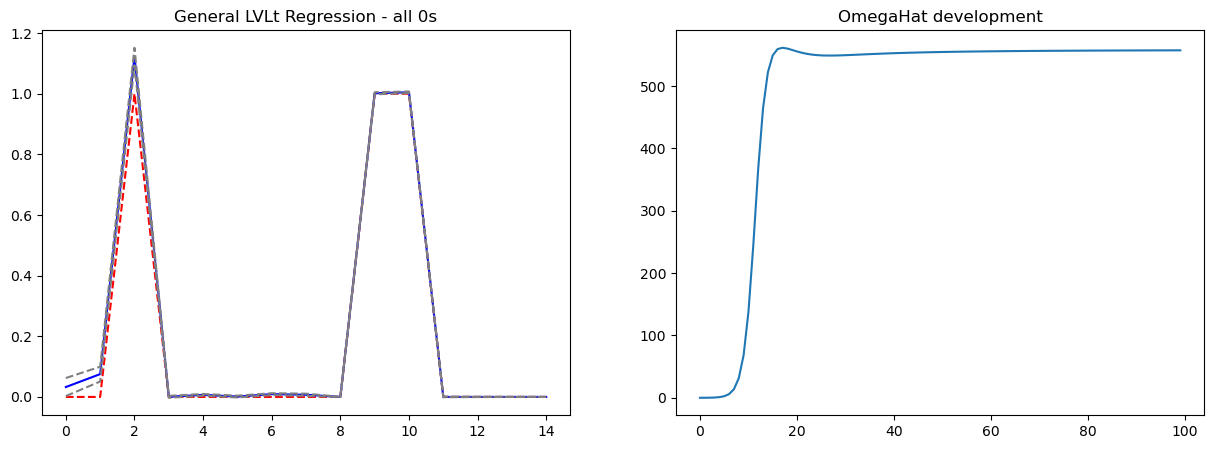

In [53]:
l0 = -1
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - all 0s")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## Korelace všech 1

In [54]:
activeL = [
    [],
    [],
    [8,9],
    [],
    [],
    [],
    [],
    [],
    [9],
    [],
    [],
    [],
    [],
    []
]

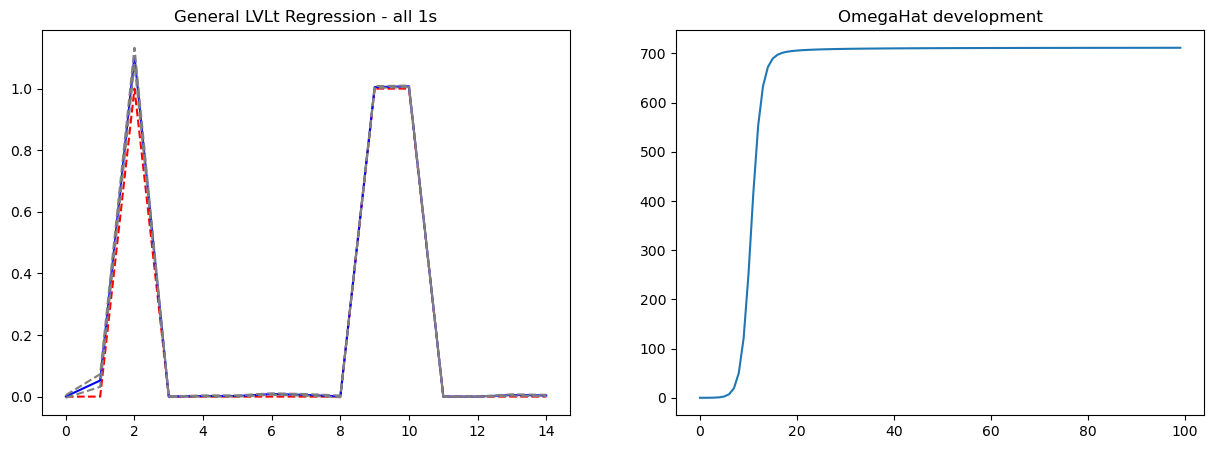

In [55]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - all 1s")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

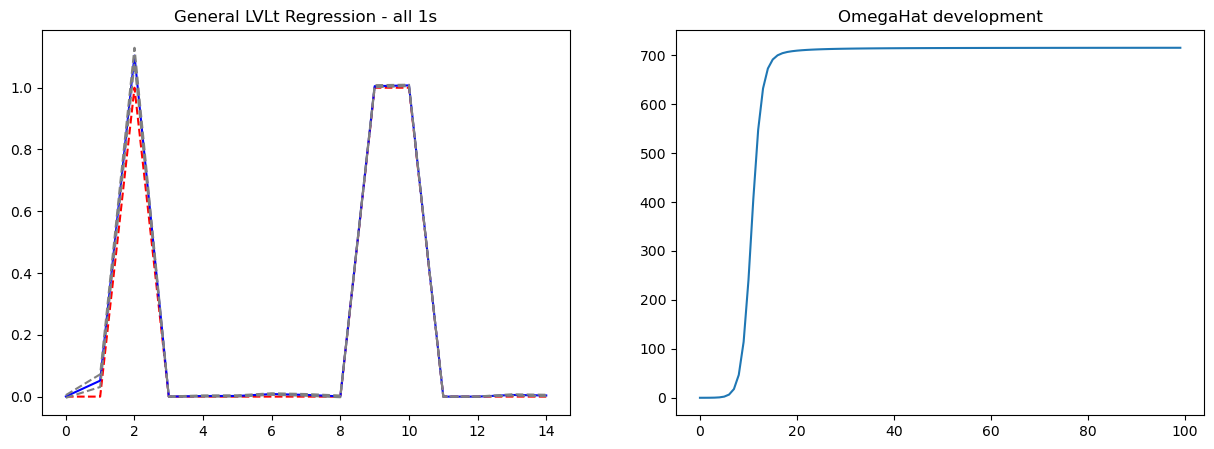

In [56]:
l0 = -1
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - all 1s")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

## Korelace všech 0 a 1

In [58]:
activeL = [
    [1,3,4,5,6,7,10,11,12,13,14],
    [3,4,5,6,7,10,11,12,13,14],
    [8,9],
    [4,5,6,7,10,11,12,13,14],
    [5,6,7,10,11,12,13,14],
    [6,7,10,11,12,13,14],
    [7,10,11,12,13,14],
    [10,11,12,13,14],
    [9],
    [],
    [11,12,13,14],
    [12,13,14],
    [13,14],
    [14],
]

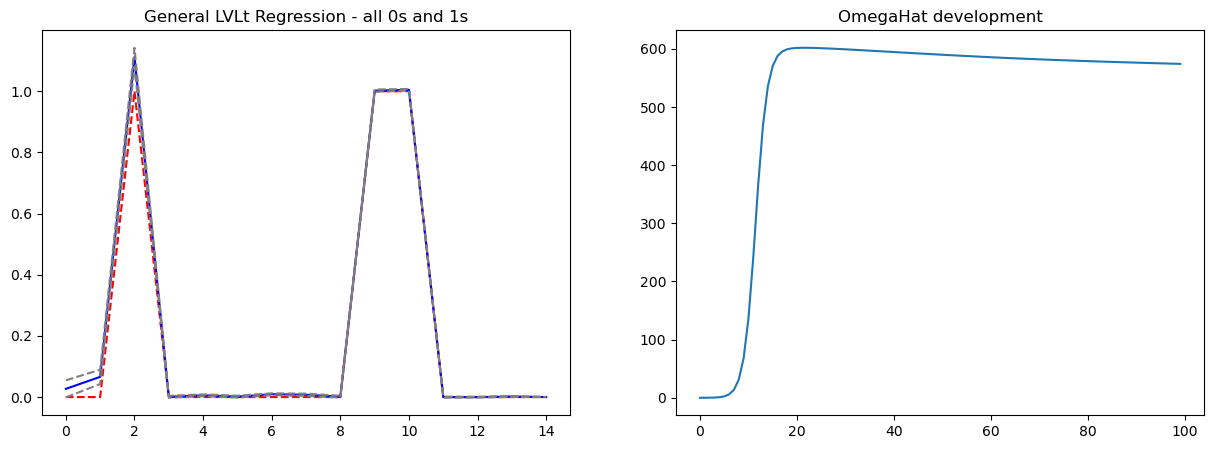

In [59]:
l0 = 0
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - all 0s and 1s")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

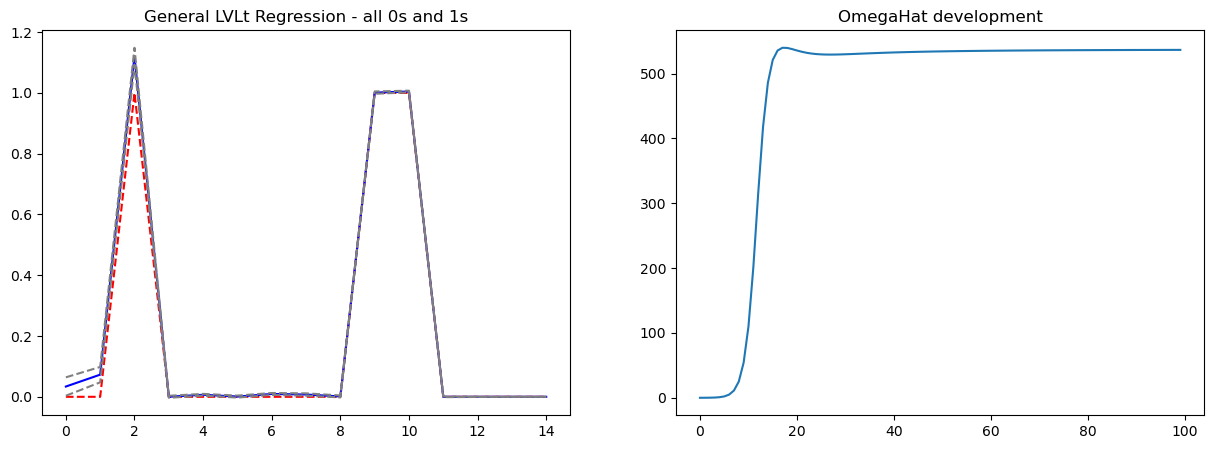

In [60]:
l0 = -1
betaHat, sigmaBeta, hist_omega = bayesGeneralLVLRegression(X,y,l0,activeL)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(beta_true,color='red',linestyle='dashed')
axs[0].plot(betaHat,color = 'blue')
unc_1 = np.matrix(betaHat) + np.matrix(np.sqrt(np.diag(sigmaBeta))).T
unc_2 = np.matrix(betaHat) - np.matrix(np.sqrt(np.diag(sigmaBeta))).T
axs[0].plot(unc_1,color = 'grey',linestyle='dashed')
axs[0].plot(unc_2,color = 'grey',linestyle='dashed')
axs[0].set_title("General LVLt Regression - all 0s and 1s")

axs[1].plot(hist_omega)
axs[1].set_title("OmegaHat development")
plt.show()

Na těchto datech tedy není vidět zásadnější rozdíl mezi různými strukturami matice L. Proto bylo pro porovnání vytvořeny další jupyter notebooky - experiments a testData.